## Data
### Breast Cancer Wisconsin (Diagnostic) Dataset
The data used in the project is UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.


## Objective
Our objective here is to predict whether the cancer is malignant(1) or benign(0), depending on the features of cancer, this can be done with a simple classification model, but we would take the help of Neural Networks for higher accuracy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/DK/OneDrive/Desktop/Data Science/udemy/TensorFlow_FILES/DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
df['Target'] = df['benign_0__mal_1']

In [6]:
df = df.drop('benign_0__mal_1', axis = 1)

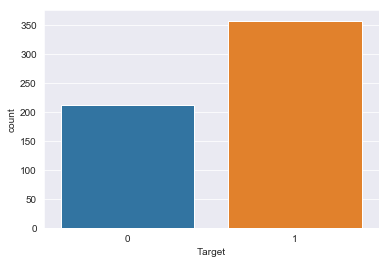

In [7]:
sns.set_style('darkgrid')
sns.countplot(df['Target'])

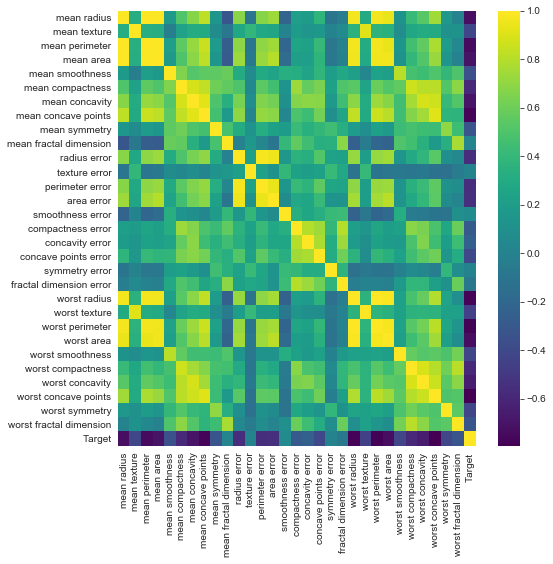

In [8]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), cmap = 'viridis')

In [9]:
df.corr()['Target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

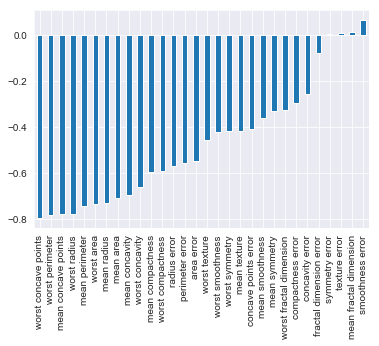

In [10]:
df.corr()['Target'][:-1].sort_values().plot(kind = 'bar')

### Train and Test Split

In [11]:
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [12]:
lr = LogisticRegression()
lr.fit(X_test, y_test)
predictions_1 = lr.predict(X_test)
print(classification_report(y_test,predictions_1))
print(confusion_matrix(y_test,predictions_1))
accuracy_1 = accuracy_score(y_test, predictions_1) * 100
print('The accuracy of model is: ' + str(accuracy_1) + '%')

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        67
           1       0.93      1.00      0.96       121

   micro avg       0.95      0.95      0.95       188
   macro avg       0.97      0.93      0.95       188
weighted avg       0.96      0.95      0.95       188

[[ 58   9]
 [  0 121]]
The accuracy of model is: 95.2127659574468%


C:\Users\DK\anaconda3\envs\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Neural Network

In [13]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
model.fit(x=X_train, y= y_train.values,
          validation_data = (X_test, y_test.values), 
          epochs = 250, batch_size = 128)

Train on 381 samples, validate on 188 samples
Epoch 1/250
381/381 [==============================] - 1s 4ms/step - loss: 0.6881 - acc: 0.5801 - val_loss: 0.6634 - val_acc: 0.6755
Epoch 2/250
381/381 [==============================] - 0s 82us/step - loss: 0.6827 - acc: 0.6010 - val_loss: 0.6569 - val_acc: 0.7234
Epoch 3/250
381/381 [==============================] - 0s 41us/step - loss: 0.6679 - acc: 0.6115 - val_loss: 0.6502 - val_acc: 0.7660
Epoch 4/250
381/381 [==============================] - 0s 91us/step - loss: 0.6652 - acc: 0.6194 - val_loss: 0.6434 - val_acc: 0.8032
Epoch 5/250
381/381 [==============================] - 0s 76us/step - loss: 0.6552 - acc: 0.6719 - val_loss: 0.6359 - val_acc: 0.8085
Epoch 6/250
381/381 [==============================] - 0s 54us/step - loss: 0.6654 - acc: 0.6352 - val_loss: 0.6283 - val_acc: 0.8457
Epoch 7/250
381/381 [==============================] - 0s 82us/step - loss: 0.6595 - acc: 0.6588 - val_loss: 0.6210 - val_acc: 0.8511
Epoch 8/250
381/3

381/381 [==============================] - 0s 41us/step - loss: 0.3027 - acc: 0.8924 - val_loss: 0.2254 - val_acc: 0.9255
Epoch 61/250
381/381 [==============================] - 0s 93us/step - loss: 0.3109 - acc: 0.8871 - val_loss: 0.2215 - val_acc: 0.9202
Epoch 62/250
381/381 [==============================] - 0s 84us/step - loss: 0.3000 - acc: 0.8871 - val_loss: 0.2180 - val_acc: 0.9202
Epoch 63/250
381/381 [==============================] - 0s 63us/step - loss: 0.3059 - acc: 0.8845 - val_loss: 0.2140 - val_acc: 0.9255
Epoch 64/250
381/381 [==============================] - 0s 63us/step - loss: 0.3235 - acc: 0.8740 - val_loss: 0.2109 - val_acc: 0.9255
Epoch 65/250
381/381 [==============================] - 0s 84us/step - loss: 0.3025 - acc: 0.8898 - val_loss: 0.2080 - val_acc: 0.9255
Epoch 66/250
381/381 [==============================] - 0s 84us/step - loss: 0.2768 - acc: 0.8766 - val_loss: 0.2044 - val_acc: 0.9255
Epoch 67/250
381/381 [==============================] - 0s 63us/step

381/381 [==============================] - 0s 63us/step - loss: 0.1693 - acc: 0.9370 - val_loss: 0.1083 - val_acc: 0.9521
Epoch 121/250
381/381 [==============================] - 0s 63us/step - loss: 0.1705 - acc: 0.9396 - val_loss: 0.1072 - val_acc: 0.9628
Epoch 122/250
381/381 [==============================] - 0s 84us/step - loss: 0.1836 - acc: 0.9291 - val_loss: 0.1065 - val_acc: 0.9628
Epoch 123/250
381/381 [==============================] - 0s 84us/step - loss: 0.2055 - acc: 0.9396 - val_loss: 0.1060 - val_acc: 0.9681
Epoch 124/250
381/381 [==============================] - 0s 84us/step - loss: 0.1855 - acc: 0.9291 - val_loss: 0.1052 - val_acc: 0.9628
Epoch 125/250
381/381 [==============================] - 0s 63us/step - loss: 0.1910 - acc: 0.9396 - val_loss: 0.1044 - val_acc: 0.9628
Epoch 126/250
381/381 [==============================] - 0s 63us/step - loss: 0.1860 - acc: 0.9370 - val_loss: 0.1039 - val_acc: 0.9681
Epoch 127/250
381/381 [==============================] - 0s 63

Epoch 180/250
381/381 [==============================] - 0s 84us/step - loss: 0.1344 - acc: 0.9580 - val_loss: 0.0674 - val_acc: 0.9787
Epoch 181/250
381/381 [==============================] - 0s 84us/step - loss: 0.1408 - acc: 0.9659 - val_loss: 0.0679 - val_acc: 0.9734
Epoch 182/250
381/381 [==============================] - 0s 63us/step - loss: 0.1313 - acc: 0.9580 - val_loss: 0.0679 - val_acc: 0.9734
Epoch 183/250
381/381 [==============================] - 0s 63us/step - loss: 0.1302 - acc: 0.9580 - val_loss: 0.0677 - val_acc: 0.9734
Epoch 184/250
381/381 [==============================] - 0s 84us/step - loss: 0.1155 - acc: 0.9633 - val_loss: 0.0675 - val_acc: 0.9787
Epoch 185/250
381/381 [==============================] - 0s 63us/step - loss: 0.1507 - acc: 0.9475 - val_loss: 0.0679 - val_acc: 0.9787
Epoch 186/250
381/381 [==============================] - 0s 84us/step - loss: 0.1353 - acc: 0.9501 - val_loss: 0.0693 - val_acc: 0.9787
Epoch 187/250
381/381 [=========================

Epoch 240/250
381/381 [==============================] - 0s 84us/step - loss: 0.1016 - acc: 0.9685 - val_loss: 0.0555 - val_acc: 0.9840
Epoch 241/250
381/381 [==============================] - 0s 84us/step - loss: 0.1062 - acc: 0.9633 - val_loss: 0.0556 - val_acc: 0.9840
Epoch 242/250
381/381 [==============================] - 0s 84us/step - loss: 0.1075 - acc: 0.9580 - val_loss: 0.0560 - val_acc: 0.9840
Epoch 243/250
381/381 [==============================] - 0s 84us/step - loss: 0.0845 - acc: 0.9738 - val_loss: 0.0576 - val_acc: 0.9734
Epoch 244/250
381/381 [==============================] - 0s 84us/step - loss: 0.0892 - acc: 0.9738 - val_loss: 0.0578 - val_acc: 0.9734
Epoch 245/250
381/381 [==============================] - 0s 84us/step - loss: 0.1190 - acc: 0.9606 - val_loss: 0.0577 - val_acc: 0.9787
Epoch 246/250
381/381 [==============================] - 0s 63us/step - loss: 0.0942 - acc: 0.9711 - val_loss: 0.0572 - val_acc: 0.9787
Epoch 247/250
381/381 [=========================

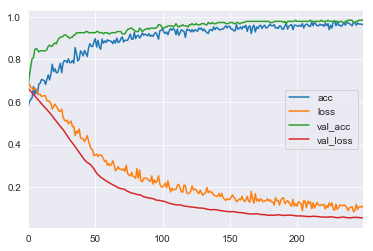

In [15]:
loss = pd.DataFrame(model.history.history)
loss.plot()

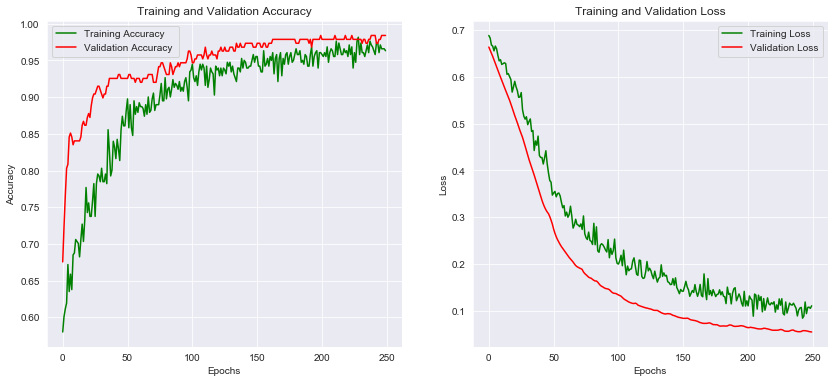

In [16]:
epochs = [i for i in range(250)]
fig, ax = plt.subplots(1,2)

ax[0].plot(epochs, model.history.history['acc'], 'g-', label = 'Training Accuracy')
ax[0].plot(epochs, model.history.history['val_acc'], 'r-', label = 'Validation Accuracy ')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, model.history.history['loss'], 'g-', label = 'Training Loss')
ax[1].plot(epochs, model.history.history['val_loss'], 'r-', label = 'Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.set_size_inches(14,6)

In [17]:
predictions_2 = model.predict_classes(X_test)
print(classification_report(y_test,predictions_2))
print(confusion_matrix(y_test,predictions_2))
accuracy_2 = accuracy_score(y_test, predictions_2) * 100
print('The accuracy of model is: ' + str(accuracy_2) + '%')

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       121

   micro avg       0.98      0.98      0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

[[ 66   1]
 [  2 119]]
The accuracy of model is: 98.40425531914893%


### Random Forest

In [18]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_test, y_test)
predictions_3 = rfc.predict(X_test)
print(classification_report(y_test,predictions_3))
print(confusion_matrix(y_test,predictions_3))
accuracy_3 = accuracy_score(y_test, predictions_3) * 100
print('The accuracy of model is: ' + str(accuracy_3) + '%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00       121

   micro avg       1.00      1.00      1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188

[[ 67   0]
 [  0 121]]
The accuracy of model is: 100.0%


In [19]:
Accuracy = pd.DataFrame({'Accuracy':[accuracy_1, accuracy_2, accuracy_3],'Model': ['Logistic Reg', 'Neural Model', 'Random Forest']})
Accuracy

,Accuracy,Model
0,95.212766,Logistic Reg
1,98.404255,Neural Model
2,100.000000,Random Forest
